In [1]:
import pandas_gbq
import pandas as pd

In [4]:
symbol = "PETR4"
df = pandas_gbq.read_gbq(
    f"""
select
    symbol, refdate, oscillation_percentage
from
    `kyd-storage.layer1_b3.tb_equity_prices`
where
    symbol in ('{symbol}', 'VALE3', 'PSSA3', 'IBOV')
order by
    refdate""",
    "kyd-storage",
    progress_bar_type=None,
)
df = df.set_index("refdate")

In [5]:
df_wide = pd.pivot_table(
    df, values="oscillation_percentage", columns="symbol", index="refdate"
)

In [6]:
df_wide /= 100
df_wide

symbol,IBOV,PETR4,PSSA3,VALE3
refdate,,,,
2016-01-05,NaN,-0.0276,0.0303,-0.0133
2016-01-06,NaN,-0.0419,-0.0189,-0.0734
2016-01-07,NaN,-0.0218,-0.0411,-0.0594
2016-01-08,NaN,0.0015,-0.0187,-0.0339
2016-01-11,NaN,-0.0287,-0.0470,-0.0284
...,...,...,...,...
2022-11-29,0.0195,0.0418,0.0067,0.0386
2022-11-30,0.0142,0.0504,0.0219,0.0150
2022-12-01,-0.0138,-0.0401,-0.0099,0.0054


<AxesSubplot: xlabel='refdate'>

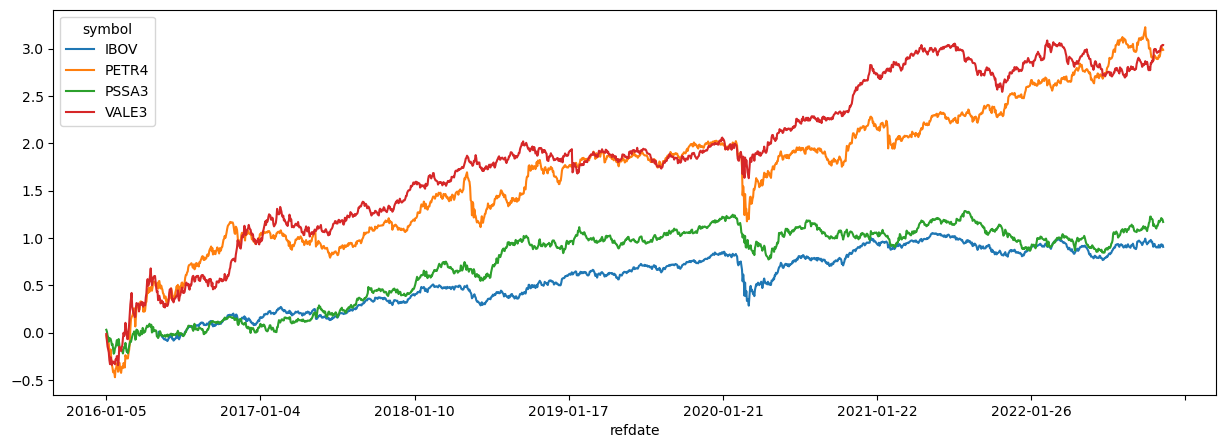

In [14]:
df_wide.cumsum().plot(figsize=(15, 5))

In [15]:
df_wide["IBOV"].loc[df_wide["IBOV"].isna()]

refdate
2016-01-05   NaN
2016-01-06   NaN
2016-01-07   NaN
2016-01-08   NaN
2016-01-11   NaN
              ..
2016-05-04   NaN
2016-05-06   NaN
2016-05-12   NaN
2016-06-30   NaN
2017-05-02   NaN
Name: IBOV, Length: 86, dtype: float64

In [16]:
df_wide[symbol].loc[df_wide[symbol].isna()]

Series([], Name: PETR4, dtype: float64)

<AxesSubplot: xlabel='refdate'>

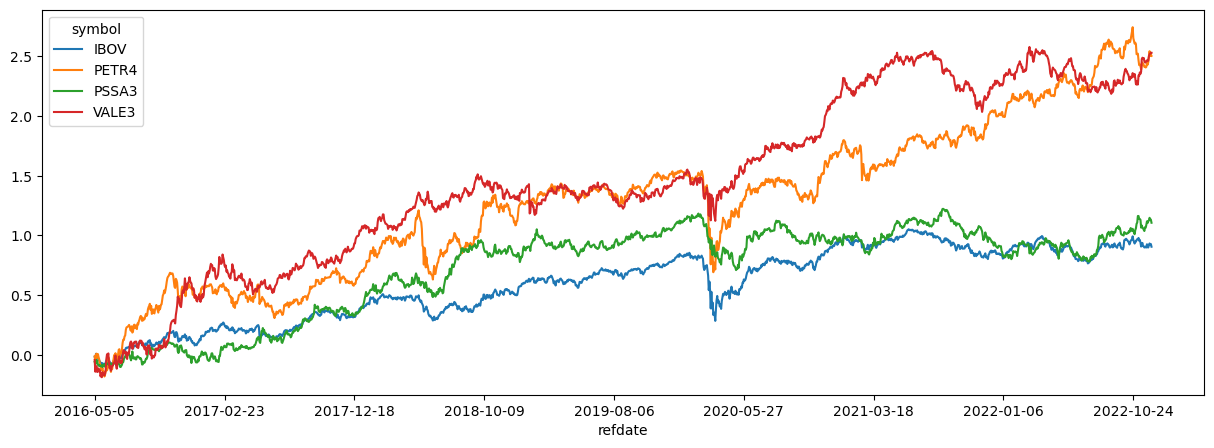

In [18]:
df_wide.dropna().cumsum().plot(figsize=(15, 5))

In [21]:
df = pandas_gbq.read_gbq(
    f"""
select
    symbol, refdate, oscillation_percentage
from
    `kyd-storage.layer1_b3.tb_equity_prices`
where
    symbol in ('BOVA11')
order by
    refdate""",
    "kyd-storage",
)
df = df.set_index("refdate")

Downloading: 100%|██████████|


In [22]:
df[df["oscillation_percentage"].isna()]

,symbol,oscillation_percentage
refdate,,
2016-01-04,BOVA11,NaN
